# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani
## Group 17

## Assignment 2 - Classification

#### Original author: Tony Vu Nguyen (301286979) - tvn4@sfu.ca
#### Created: Mar 3, 2022
#### Modified: Mar 3, 2022

In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python


## 1. Getting Started

In [9]:
# Load dataset
df = pd.read_csv('datasets\heart_failure_dataset.csv', header=0)

In [10]:
## 1.1 Deceased patients (target) that had anaemia and were smokers (features)

df_d = df[df['death_event']==1] # Number of deceased patients
df_da = df_d[df_d['anaemia']==1] # Number of deceased patients with anemia
df_das = df_da[df_da['smoking']==1] # Number of deceased patients with anemia and were smokers

print('Percent of deceased patients that had anaemia and were smokers: %.1f%%' %(len(df_das)/len(df_d)*100))

Percent of deceased patients that had anaemia and were smokers: 12.5%


Mean CPK Levels of Alive Patients: 540
Mean CPK Levels of Dead Patients: 670


C:\Users\Tony\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0, 0.5, 'CPK Levels [mcg/L]')

<Figure size 432x288 with 0 Axes>

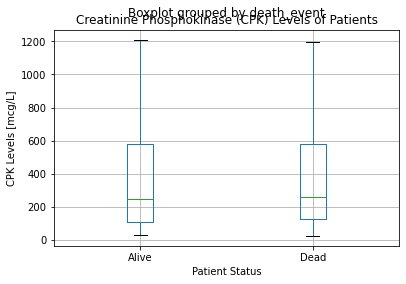

In [46]:
## 1.2a: Mean
df_a = df[df['death_event']==0]
df_CPK = df[['creatinine_phosphokinase', 'death_event']]
df_CPK['death_event'].replace({0:'Alive',1:'Dead'}, inplace=True)

CPK_mean = [df_a['creatinine_phosphokinase'].mean(), df_d['creatinine_phosphokinase'].mean()]
print('Mean CPK Levels of Alive Patients: %i'%CPK_mean[0])
print('Mean CPK Levels of Dead Patients: %i'%CPK_mean[1])

# Boxplot
plt.figure()
df_CPK.boxplot(by='death_event', showfliers=False)
plt.title('Creatinine Phosphokinase (CPK) Levels of Patients')
plt.xlabel('Patient Status')
plt.ylabel('CPK Levels [mcg/L]')

In [18]:
## 1.2b: T-test
from scipy.stats import ttest_ind
T, P = ttest_ind(df_a['creatinine_phosphokinase'],df_d['creatinine_phosphokinase'])

print("p-value =", P)
# if the p-value is less than 0.05 we have significant different between feature values
if P < 0.05:
    print("significant")
else:
    print("not significant")


p-value = 0.27961124573614
not significant


## 2. Logistic Regression

In [61]:
## Splitting data into 80/20 training/test split

# Split features and targets: F=Features, T=Targets
F = df.iloc[:, :-1]
T = df['death_event']

# Splitting dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
F_train, F_test, T_train, T_test = train_test_split(F, T, test_size=0.2)

In [67]:
## 2.1 Model Training

# Import the class
from sklearn.linear_model import LogisticRegression

# Instantiating the model (using the default parameters)
logR = LogisticRegression()

# Fitting the model with data
logR.fit(F_train,T_train)

# Save the Trained Model
pickle.dump(logR, open('Model_LogisticRegression.pkl', 'wb'))

# Predicting the labels on test set
T_pred = logR.predict(F_test)

In [68]:
## 2.1 Model Evaluation

# import the metrics class
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(T_test, T_pred)
print('Confusion Matrix\n', cm)

Confusion Matrix
 [[40  3]
 [13  4]]


Confusion Matrix
 [[40  3]
 [13  4]]
Accuracy: 0.7333333333333333
Precision: 0.5714285714285714
Recall: 0.23529411764705882
F1 Score: 0.3333333333333333


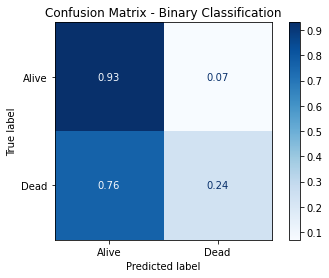

In [71]:
## 2.1 Model Evaluation

# import the metrics class
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(T_test, T_pred)
print('Confusion Matrix\n', cm)

plt_cm = plot_confusion_matrix(logR, F_test, T_test,
                                       display_labels=['Alive','Dead'],
                                       cmap=plt.cm.Blues,
                                       normalize='true')
plt_cm.ax_.set_title('Confusion Matrix - Binary Classification')

# Print Evaluation Metrics
print("Accuracy:",accuracy_score(T_test, T_pred))
print("Precision:",precision_score(T_test, T_pred))
print("Recall:",recall_score(T_test, T_pred))
print("F1 Score:",f1_score(T_test, T_pred))